<a href="https://colab.research.google.com/github/pulkitmehtawork/Keras/blob/master/keras_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb
(train_data,train_labels) , (test_data,test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [2]:
train_labels[0]

1

In [3]:
word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [4]:
len(word_index)

88584

In [5]:
index_word = dict([  (value,key)  for (key,value) in word_index.items() ])

In [6]:
' '.join([index_word.get(i-3,'?') for i in train_data[0]])

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [7]:
a = dict({'a':0,
          'b':1})

In [8]:
a['a']

0

In [9]:
a.get('abn','c')

'c'

In [10]:
# encoding integer sequence into binary matrix 
import numpy as np 

def vectorize_sequences(sequences, dimensions = 10000):
  results = np.zeros((len(sequences),dimensions))
  for i, seq  in enumerate(sequences):
    results[i,seq] = 1
  return results

X_train = vectorize_sequences(train_data)
X_test= vectorize_sequences(test_data)


In [11]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [14]:
# model definition

from keras import models 
from keras import layers
model = models.Sequential()

model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


In [21]:
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer = optimizers.RMSprop(lr=0.001),
              loss = losses.binary_crossentropy,
              metrics = ['acc']
              )

In [22]:
X_val = X_train[:10000]
partial_x_train = X_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [23]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size = 512,
                    validation_data = (X_val,y_val)                   
                    )

Epoch 1/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0126 - acc: 0.9967 - val_loss: 0.7638 - val_acc: 0.8672
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0015 - acc: 0.9999 - val_loss: 0.7863 - val_acc: 0.8656
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0038 - acc: 0.9989 - val_loss: 0.8299 - val_acc: 0.8669
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 7.6109e-04 - acc: 1.0000 - val_loss: 0.8525 - val_acc: 0.8664
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 6.4042e-04 - acc: 1.0000 - val_loss: 1.0490 - val_acc: 0.8473
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0011 - acc: 0.9999 - val_loss: 0.9201 - val_acc: 0.8647
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0043 - acc: 0.9987 - val_loss: 1.0459 - val_acc: 0.8556
Epoch 8/20
30/30 [==============================] - 1s 32ms/step - loss: 3.

In [20]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

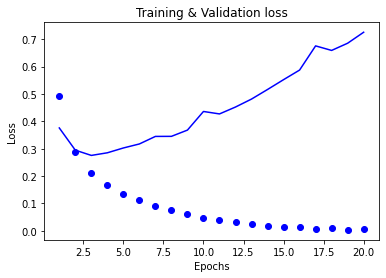

In [30]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) +1)

plt.plot(epochs,loss_values,'bo', label = 'Training Loss')
plt.plot(epochs,val_loss_values,'b', label = 'Validation Loss')

plt.title('Training & Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()




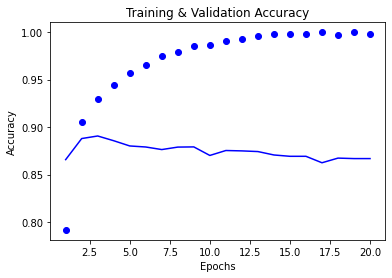

In [31]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(history_dict['accuracy']) +1)

plt.plot(epochs,acc_values,'bo', label = 'Training Accuracy')
plt.plot(epochs,val_acc_values,'b', label = 'Validation Accuracy')

plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()